# Visual Product Evaluation

TinyTroupe now supports a **vision modality**: agents can *see* real images and react to them, just as a human participant would in a focus group or product evaluation session.

In this notebook we demonstrate the power of this feature by showing agents an actual product photograph — **without describing it in text** — and observing their reactions. Every substantive detail the agents produce (bottle shapes, label text, colours, shelf layout) must come **exclusively from visual perception**. We also contrast vision-equipped agents against text-only agents, and show how multiple agents can collaborate on visual feedback in a `TinyWorld`.

This exercises the *visual perception → cognition → action* loop from Cognitive Psychology (cf. Marr, 1982): an external visual stimulus is perceived, a mental representation is formed, and the agent's subsequent behaviour reflects the content of that perception.

In [1]:
import json
import sys
sys.path.insert(0, '..')

import tinytroupe
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld
from tinytroupe.extraction import ResultsExtractor
from tinytroupe.examples import create_oscar_the_architect, create_lisa_the_data_scientist, create_marcos_the_physician


!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!

Looking for default config on: c:\Users\pdasilva\repos\TinyTroupe\examples\..\tinytroupe\utils\..\config.ini
Found custom config on: c:\Users\pdasilva\repos\TinyTroupe\examples\config.ini
TinyTroupe version: 0.6.0
Current date and time (local): 2026-02-11 10:19:16
Current date and time (UTC):   2026-02-11 13:19:16

Current TinyTroupe configuration 
[OpenAI]
api_type = openai
azure_api_version = 2024-08-01-preview
model = gpt-5-mini
reasoning_model = o3-mini
vision_detail = auto
embedding_model = text-embedding-3-small
azure_embedding_model_api_version = 2023-05-15
max_completion_tokens = 128000
timeout = 480
max_attempts = 5
waiting_time = 0
exponential_backoff_factor = 5
max_concurrent_model_calls = 4
reasoning_e

## 1. The stimulus image

Below is the photograph the agents will see. It shows several bottles of **Spanish gazpacho** on a supermarket shelf. We will **not** tell the agents what the product is — they must figure it out from the image alone.

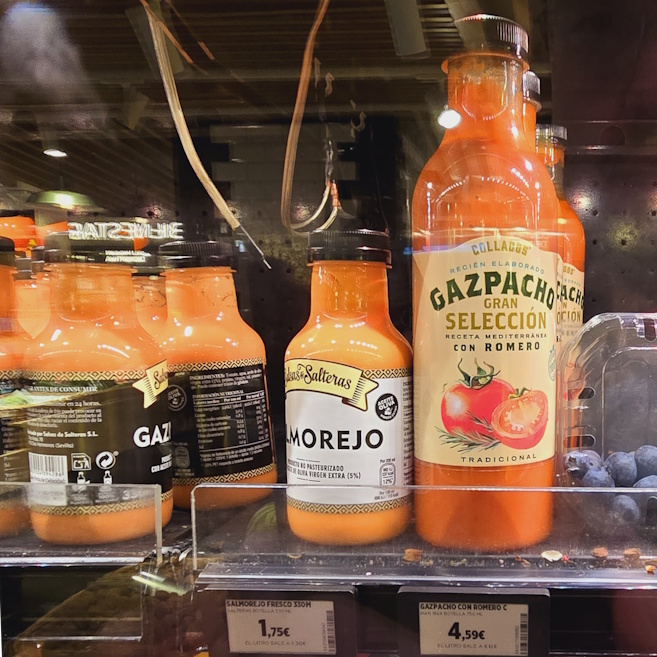

In [2]:
from IPython.display import Image, display

GAZPACHO_IMAGE = "./images/spanish_bottled_gazpacho.jpg"
display(Image(filename=GAZPACHO_IMAGE, width=500))

## 2. Does the image really matter?

To prove that the image adds real information, we compare two scenarios using the same generic prompt:
1. **Text-only**: Lisa receives the prompt but **no image** — she can only produce vague, generic thoughts.
2. **With vision**: Oscar receives the same prompt **plus** the actual photograph — he should mention specific visual details (gazpacho, bottles, labels, shelf layout) that are impossible to know without seeing the image.

In [3]:
prompt = "A product you encountered at a supermarket."

# Scenario A: Text-only — Lisa receives the prompt but NO image
lisa = create_lisa_the_data_scientist()
lisa.see(description=prompt)
lisa.act()

USER --> Lisa Carter: [VISUAL] 
          > A product you encountered at a supermarket.

Lisa Carter acts: [THINK] 
                 > I saw a product at the supermarket — a new oat-based creamer in a matte carton
                 > placed between dairy milk and plant-based milks. Packaging looked minimalist and
                 > the front label emphasized 'oat' but didn't clearly say 'coffee creamer' which
                 > could make its intent ambiguous to shoppers. As Lisa (data scientist and home
                 > cook) I notice this both from a user-experience angle and from a data/metadata
                 > angle: unclear labels are like messy datasets that make mapping user intent to
                 > product results harder. I should describe the observation, relate it to
                 > search/metadata improvements, and offer a concise checklist or experiment idea.

Lisa Carter acts: [TALK] 
                 > At the supermarket I noticed a new oat-based creamer in a matte carton. It called
                 > out 'oat' prominently but didn't explicitly say 'coffee creamer' on the front and
                 > was shelved between dairy and plant-based milks — a placement that could confuse
                 > shoppers. From my perspective as a data scientist who cares about clear signals,
                 > this is a small but important example of ambiguous product metadata. Practical
                 > suggestions: 1) Front-of-pack clarity — add a clear descriptor such as 'coffee
                 > creamer' and small icons like 'plant-based' or 'gluten-free'. 2) Online metadata
                 > — include synonyms and attributes (e.g., productCategory: non-dairy creamer,
                 > keywords: oat creamer, oat milk creamer, coffee creamer) and structured
                 > properties (schema.org/Product additionalProperty) so search systems map varied
                 > queries to the product. 3) Shelf/signage consistency — ensure in-store placement
                 > and shelf labels match the product category. If you want, I can draft a short
                 > checklist for metadata fields and a simple A/B test plan to measure whe (...)

Lisa Carter acts: [DONE] 
                 > Waiting for your response.

Now the same prompt, but this time **with the actual product image**. Notice how much more specific and grounded the output becomes:

In [4]:
# Scenario B: With vision — same prompt PLUS the actual image
oscar = create_oscar_the_architect()
oscar.see(images=GAZPACHO_IMAGE, description=prompt)
oscar.act()

USER --> Oscar: [VISUAL] 
          > A product you encountered at a supermarket.  A refrigerated supermarket shelf holding
          > several bottles of ready-to-eat cold soups: orange-red gazpacho and salmorejo. Prominent
          > labels read “Gazpacho Gran Selección” (with a tomato illustration) and “Salmorejo,” and
          > a larger bottle is displayed at right. Price tags below show €1.75 and €4.59, and a
          > small pack of blueberries sits to the right.  Image reference IDs:  [+ 1
          > image(s): img_1]

Oscar acts: [THINK] 
           > I examine the image (img_1): a refrigerated shelf with bottled cold soups — orange-red
           > gazpacho and salmorejo. Notable details: the large bottle on the right is labeled
           > "Gazpacho Gran Selección" with a tomato illustration and the words "con romero"; its
           > price tag reads €4.59. A smaller bottle labeled "Salmorejo" sits beside it with a price
           > tag of €1.75. A small pack of blueberries is placed to the right of the bottles.
           > Visually, the larger gazpacho bottle appears to be glass (glossy reflections, heavier
           > profile) and conveys a premium feel; the smaller bottles look like lightweight retail
           > packaging (likely PET) and read as convenience/more affordable options. From a design
           > perspective: the label art is Mediterranean and traditional — effective for signaling
           > authenticity. The price gap suggests deliberate tiering: premium (glass/artisanal) vs
           > economy (small, cheaper format). Shelf layout creates contrast but the blueberries feel
           > like an odd adjacency — either playful cross-merchandising or a stocking compromise
           > (...)

Oscar acts: [TALK] 
           > Nice little supermarket find. The "Gazpacho Gran Selección" in the big bottle reads
           > premium — classic tomato illustration, "con romero" makes it feel handmade — and it's
           > priced at €4.59; the smaller "Salmorejo" at €1.75 looks like the everyday, grab-and-go
           > option. As an architect I always notice how packaging and material communicate value:
           > glass signals care and quality, light plastic signals convenience and lower cost. The
           > blueberries next to the soups made me smile — creative cross-merchandising or someone
           > ran out of space. If I were advising a client on this kind of product I'd recommend a
           > minimalist, legible label, prioritize recyclable materials when margin allows, and
           > explore concentrated/refill options to cut packaging and transport impact. Also — now
           > I'm hungry. Salmorejo for lunch sounds tempting.

Oscar acts: [DONE] 
           > Finished observing and commenting on the supermarket image (img_1).

## 3. Medical consultation: a physician reads an X-ray

To show that vision goes far beyond product evaluation, we bring in **Marcos the physician**. He receives a chest X-ray image — we tell him it belongs to his patient Oscar — and must explain what he observes. Since the X-ray actually shows signs of pneumonia, Marcos should identify the pathology **from the image alone**, demonstrating that domain expertise shapes how agents interpret visual stimuli.

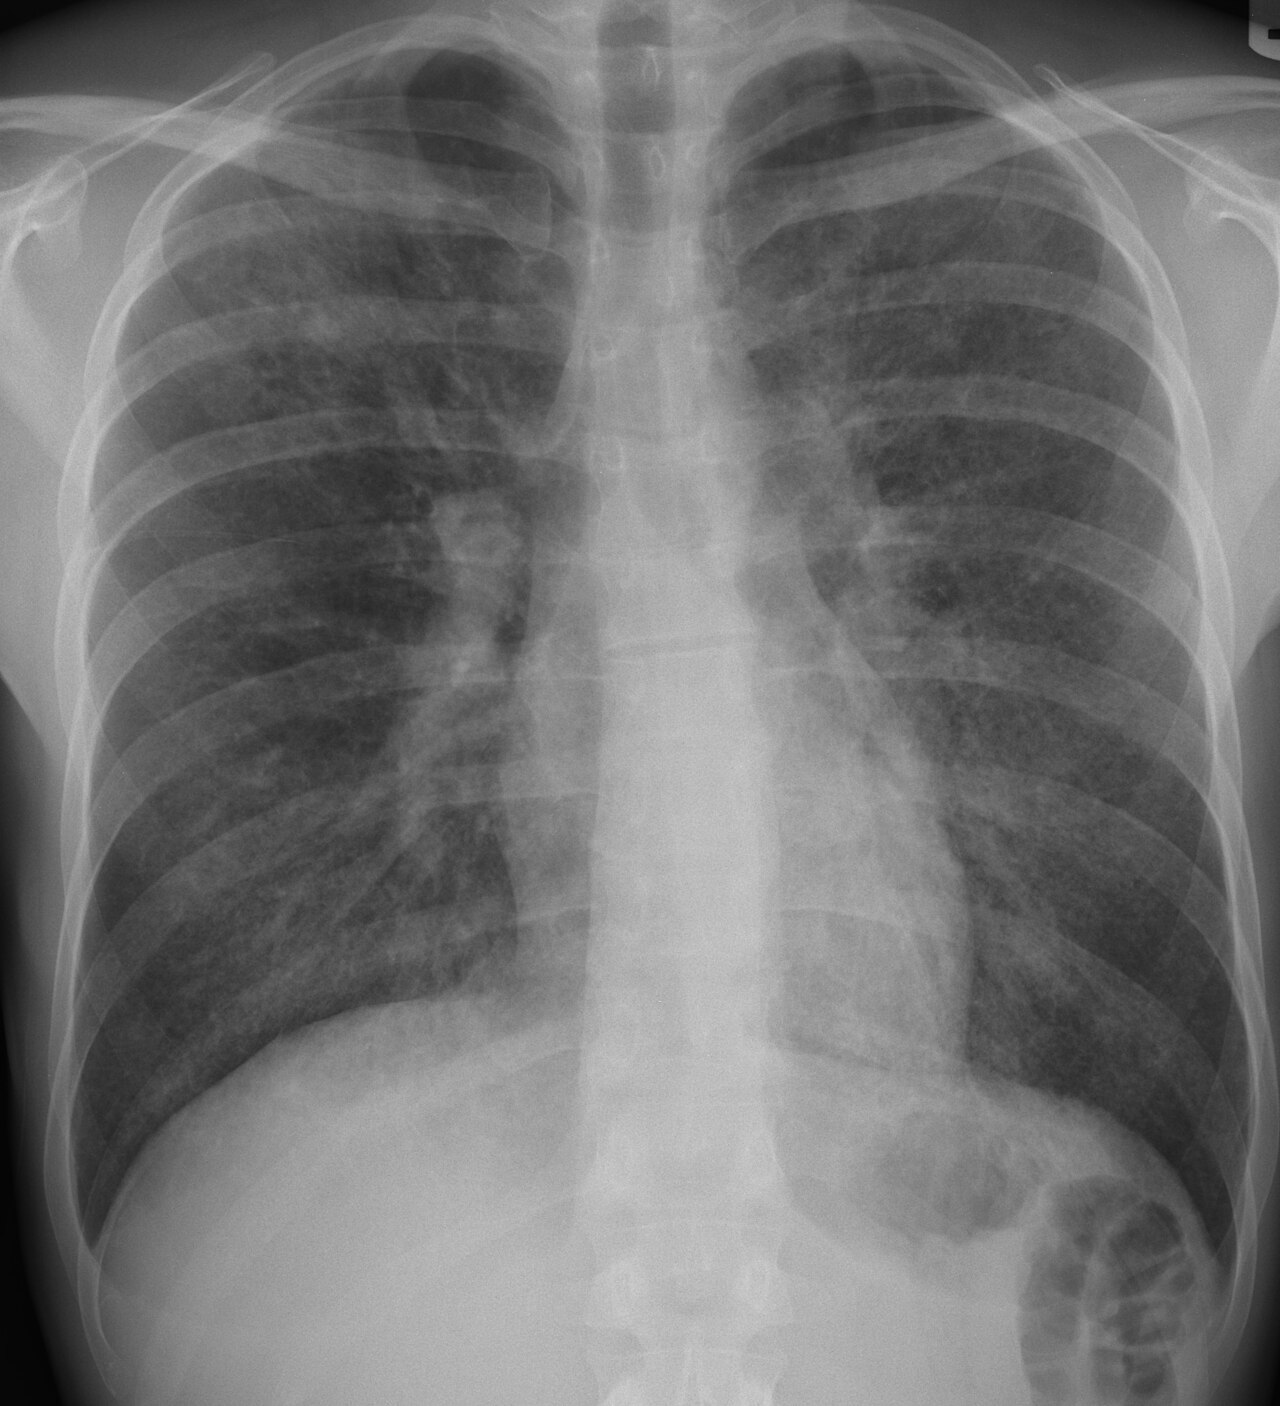

In [5]:
XRAY_IMAGE = "./images/X-ray_pneumonia.JPG"
display(Image(filename=XRAY_IMAGE, width=400))

In [6]:
marcos = create_marcos_the_physician()
marcos.see(
    images=XRAY_IMAGE
)
marcos.listen(
    "You are looking at an X-ray of Oscar's chest. "
    "Based on this X-ray, what do you think is going on with Oscar? "
    "Please provide a diagnosis and a treatment plan directly to him."
)

oscar.listen("You are in a clinic with Dr. Marcos, who just showed you an X-ray of your chest. He's going to explain what is happening and recommend something.")

clinic = TinyWorld("Clinic", [marcos, oscar])
clinic.run(3)

USER --> Marcos Almeida: [VISUAL] 
          > Frontal chest radiograph with normal cardiomediastinal silhouette for technique. Lungs
          > show diffuse peribronchial/perihilar and mild interstitial markings bilaterally, greater
          > centrally, with mild hyperinflation. No focal lobar air‑space consolidation, pleural
          > effusion, or pneumothorax identified. Bones and visualized soft tissues unremarkable.
          > Image reference IDs:  [+ 1 image(s): img_1]

USER --> Marcos Almeida: [CONVERSATION] 
          > You are looking at an X-ray of Oscar's chest. Based on this X-ray, what do you think is
          > going on with Oscar? Please provide a diagnosis and a treatment plan directly to him.

USER --> Oscar: [CONVERSATION] 
          > You are in a clinic with Dr. Marcos, who just showed you an X-ray of your chest. He's
          > going to explain what is happening and recommend something.

─────────────────────────────────────────────── Clinic step 1 of 3 ────────────────────────────────────────────────

Oscar acts: [THINK] 
           > Two stimuli to process: (1) the supermarket image of bottled gazpacho/salmorejo (I
           > notice packaging tiers, glass signalling premium, small blueberry pack odd placement) —
           > a small sensory detail that's lingering and making me a bit hungry; (2) I'm in a clinic
           > with Dr. Marcos who just showed me a chest X-ray. I am not a medical professional
           > (architecture background), so I should be explicit about my limited knowledge and ask
           > clear, direct questions. My priorities: calmly understand what the X-ray actually shows
           > (infection, fluid, scarring, mass, or artifact?), how urgent it is, what immediate
           > steps Dr. Marcos recommends (further imaging, blood tests, medication, follow-up), and
           > whether this affects my ability to work or requires time off. I should also ask how
           > findings relate to any symptoms I might have and what signs would require urgent
           > return. Keep questions simple and practical so I can make decisions and avoid
           > unnecessary worry.

Oscar acts: [TALK] 
           > Thank you, Dr. Marcos. I'm not a doctor, so could you explain what you're seeing on the
           > X-ray in plain language? Specifically: (1) what does the image show — is it likely
           > infection, fluid, old scarring, or something else? (2) how urgent is it and do you
           > recommend any immediate treatment or tests (for example further imaging or blood work)?
           > (3) should I change anything right now — rest, avoid exercise, or any medications — and
           > might I need time off work? Also, how well do these findings match symptoms I might
           > have? Sorry if I seem a bit distracted — I had a supermarket brain about a nice
           > gazpacho — but I want to be clear so I can follow your recommendations.

Oscar acts: [DONE] 
           > Waiting for Dr. Marcos to explain the X-ray and recommend next steps.

Marcos Almeida acts: [THINK] 
                    > Look at the image description: frontal chest radiograph with normal
                    > cardiomediastinal silhouette; diffuse peribronchial/perihilar and mild
                    > interstitial markings bilaterally (greater centrally); mild hyperinflation; no
                    > focal lobar air-space consolidation, pleural effusion, or pneumothorax. These
                    > findings favor a diffuse small-airways/reactive process (viral
                    > bronchitis/bronchiolitis or asthma/reactive airways disease) rather than a
                    > lobar bacterial pneumonia. Hyperinflation supports airway obstruction. I
                    > should recommend correlation with symptoms (fever, cough, wheeze, shortness of
                    > breath, oxygen saturation) and propose an appropriate stepwise treatment and
                    > safety-netting plan. Remind to seek urgent care for red flags.

Marcos Almeida acts: [TALK] 
                    > Hi Oscar — I looked at your chest X‑ray. In plain language: your heart size
                    > looks normal and there is no single area of solid consolidation or fluid
                    > collection. What I see instead is a more diffuse pattern of peribronchial and
                    > perihilar markings with mild hyperinflation. That pattern most commonly means
                    > inflammation or irritation of the small airways — think viral bronchitis,
                    > bronchiolitis, or an asthma/reactive‑airways flare — rather than a lobar
                    > bacterial pneumonia.  What this means for you now: - If your symptoms are mild
                    > (some cough, no high fever, no significant breathlessness) the usual approach
                    > is supportive care: rest, fluids, paracetamol/ibuprofen for fever or pain, and
                    > inhaled short‑acting bronchodilator if you have wheeze or tightness
                    > (salbutamol via inhaler with spacer, or nebulizer if needed). - If you have a
                    > history of asthma/COPD, use your usual inhalers; consider a short course of
                    > oral corticosteroid (for example, a typical option is prednisone for 3–5 days)
                    > if you or your physician feel you a (...)

Marcos Almeida acts: [DONE] 
                    > Waiting for Oscar's symptoms/history to personalise the plan; advise follow-up
                    > or urgent care if red flags.

Marcos Almeida --> Oscar: [CONVERSATION] 
                    > Hi Oscar — I looked at your chest X‑ray. In plain language: your heart size
                    > looks normal and there is no single area of solid consolidation or fluid
                    > collection. What I see instead is a more diffuse pattern of peribronchial and
                    > perihilar markings with mild hyperinflation. That pattern most commonly means
                    > inflammation or irritation of the small airways — think viral bronchitis,
                    > bronchiolitis, or an asthma/reactive‑airways flare — rather than a lobar
                    > bacterial pneumonia.  What this means for you now: - If your symptoms are mild
                    > (some cough, no high fever, no significant breathlessness) the usual approach
                    > is supportive care: rest, fluids, paracetamol/ibuprofen for fever or pain, and
                    > inhaled short‑acting bronchodilator if you have wheeze or tightness
                    > (salbutamol via inhaler with spacer, or nebulizer if needed). - If you have a
                    > history of asthma/COPD, use your usual inhalers; consider a short course of
                    > oral corticosteroid (for example, a typical option is prednisone for 3–5 days)
                    > if you or your physician feel you a (...)

Oscar --> Marcos Almeida: [CONVERSATION] 
           > Nice little supermarket find. The "Gazpacho Gran Selección" in the big bottle reads
           > premium — classic tomato illustration, "con romero" makes it feel handmade — and it's
           > priced at €4.59; the smaller "Salmorejo" at €1.75 looks like the everyday, grab-and-go
           > option. As an architect I always notice how packaging and material communicate value:
           > glass signals care and quality, light plastic signals convenience and lower cost. The
           > blueberries next to the soups made me smile — creative cross-merchandising or someone
           > ran out of space. If I were advising a client on this kind of product I'd recommend a
           > minimalist, legible label, prioritize recyclable materials when margin allows, and
           > explore concentrated/refill options to cut packaging and transport impact. Also — now
           > I'm hungry. Salmorejo for lunch sounds tempting.

Oscar --> Marcos Almeida: [CONVERSATION] 
           > Thank you, Dr. Marcos. I'm not a doctor, so could you explain what you're seeing on the
           > X-ray in plain language? Specifically: (1) what does the image show — is it likely
           > infection, fluid, old scarring, or something else? (2) how urgent is it and do you
           > recommend any immediate treatment or tests (for example further imaging or blood work)?
           > (3) should I change anything right now — rest, avoid exercise, or any medications — and
           > might I need time off work? Also, how well do these findings match symptoms I might
           > have? Sorry if I seem a bit distracted — I had a supermarket brain about a nice
           > gazpacho — but I want to be clear so I can follow your recommendations.

─────────────────────────────────────────────── Clinic step 2 of 3 ────────────────────────────────────────────────

Oscar acts: [THINK] 
           > Dr. Marcos's read sounds reassuring overall: normal heart size, no focal consolidation
           > or effusion, and a pattern consistent with small-airways inflammation/reactive airways.
           > Best immediate approach is conservative unless objective signs (low O2, severe
           > breathlessness, high fever) appear. I should get objective data (pulse oximetry,
           > temperature) and clarify whether I should start a short-acting bronchodilator now and
           > under what circumstances a short steroid course would be recommended. I also need to
           > know how this affects work: can I continue with light duties or should I take time off
           > if coughing or exertional breathlessness worsens? Practical next steps for me: (1)
           > report current symptoms clearly, (2) ask for an in-clinic O2 reading, (3) ask whether
           > to start salbutamol now if I feel tight/wheezy, and (4) clarify steroid threshold and
           > follow-up timing. Keep tone calm and concise. A small aside: I keep thinking about that
           > gazpacho on the shelf — must be the hunger, not helpful when trying to sound serious.

Oscar acts: [TALK] 
           > Thanks — that explanation helps a lot. A quick summary of how I feel right now: I have
           > a mild cough, no high fever that I know of, no significant breathlessness at rest, and
           > I don't have a formal diagnosis of asthma or COPD. I have noticed a little chest
           > tightness and occasional wheeze with exertion, but nothing severe. I don't have a pulse
           > oximeter with me at the moment.  Could you please: (1) check my oxygen saturation here
           > if possible, (2) advise whether I should start a short-acting bronchodilator
           > (salbutamol inhaler) now if I feel wheezy, and (3) tell me under which circumstances
           > you'd recommend a short oral steroid course — immediately, or only if symptoms worsen
           > or oxygen falls? Also, would you advise I take the next 48 hours off work or is light
           > activity/working from home acceptable if symptoms remain mild?  If you want me to get
           > any specific tests now (o2 sats, temp, bloods) I'm happy to do them. Thanks again — I
           > prefer clear steps rather than worrying in circles.

Oscar acts: [DONE] 
           > Waiting for Dr. Marcos to check O2 sats and advise on inhaler/steroid/work guidance.

Marcos Almeida acts: [THINK] 
                    > Look at the radiograph description and prior notes. Key imaging findings:
                    > normal heart size, diffuse peribronchial/perihilar and mild interstitial
                    > markings bilaterally (central), mild hyperinflation, no focal lobar
                    > consolidation, no effusion, no pneumothorax. These favor a small-
                    > airways/airway-reactive process (viral bronchitis, bronchiolitis, or
                    > asthma/reactive airways) rather than a lobar bacterial pneumonia. Important to
                    > correlate with current symptoms (fever, sputum, breathlessness, wheeze) and
                    > baseline lung history (asthma, COPD, smoking). Plan the reply to answer
                    > Oscar's three numbered questions in plain language, give practical immediate
                    > steps (supportive care, inhaled bronchodilator if wheeze, oral steroid if
                    > known asthma and moderate symptoms), suggest simple tests (pulse oximetry,
                    > consider CBC/CRP if worried about bacterial infection), and provide clear red-
                    > flag criteria for urgent care. Keep tone warm and reassuring.

Marcos Almeida acts: [TALK] 
                    > Hi Oscar — good question, and nice supermarket brain is allowed! I’ll answer
                    > each point in plain language.  1) What does the image show? Is it infection,
                    > fluid, old scarring, or something else? - The X‑ray shows a diffuse pattern of
                    > thicker markings around the central airways and a bit of lung overinflation.
                    > That pattern most commonly means irritation or inflammation of the small
                    > airways — think viral bronchitis/bronchiolitis or an asthma/reactive‑airways
                    > flare.  - I do NOT see a single solid area of lobar consolidation that would
                    > suggest a classic lobar bacterial pneumonia, and there’s no fluid (pleural
                    > effusion) or collapsed lung. Old scarring tends to be more localized and
                    > stable over time; this looks more like a diffuse/active process, although past
                    > lung disease could give similar chronic changes if present.  2) How urgent is
                    > it and what immediate tests or treatments do I recommend? - Urgency depends on
                    > how you feel. If you have only a mild cough, no high fever, no significant
                    > breathlessness, this can usu (...)

Marcos Almeida acts: [DONE] 
                    > Waiting for Oscar's symptoms/history to personalise recommendations.

Marcos Almeida --> Oscar: [CONVERSATION] 
                    > Hi Oscar — good question, and nice supermarket brain is allowed! I’ll answer
                    > each point in plain language.  1) What does the image show? Is it infection,
                    > fluid, old scarring, or something else? - The X‑ray shows a diffuse pattern of
                    > thicker markings around the central airways and a bit of lung overinflation.
                    > That pattern most commonly means irritation or inflammation of the small
                    > airways — think viral bronchitis/bronchiolitis or an asthma/reactive‑airways
                    > flare.  - I do NOT see a single solid area of lobar consolidation that would
                    > suggest a classic lobar bacterial pneumonia, and there’s no fluid (pleural
                    > effusion) or collapsed lung. Old scarring tends to be more localized and
                    > stable over time; this looks more like a diffuse/active process, although past
                    > lung disease could give similar chronic changes if present.  2) How urgent is
                    > it and what immediate tests or treatments do I recommend? - Urgency depends on
                    > how you feel. If you have only a mild cough, no high fever, no significant
                    > breathlessness, this can usu (...)

Oscar --> Marcos Almeida: [CONVERSATION] 
           > Thanks — that explanation helps a lot. A quick summary of how I feel right now: I have
           > a mild cough, no high fever that I know of, no significant breathlessness at rest, and
           > I don't have a formal diagnosis of asthma or COPD. I have noticed a little chest
           > tightness and occasional wheeze with exertion, but nothing severe. I don't have a pulse
           > oximeter with me at the moment.  Could you please: (1) check my oxygen saturation here
           > if possible, (2) advise whether I should start a short-acting bronchodilator
           > (salbutamol inhaler) now if I feel wheezy, and (3) tell me under which circumstances
           > you'd recommend a short oral steroid course — immediately, or only if symptoms worsen
           > or oxygen falls? Also, would you advise I take the next 48 hours off work or is light
           > activity/working from home acceptable if symptoms remain mild?  If you want me to get
           > any specific tests now (o2 sats, temp, bloods) I'm happy to do them. Thanks again — I
           > prefer clear steps rather than worrying in circles.

─────────────────────────────────────────────── Clinic step 3 of 3 ────────────────────────────────────────────────

Oscar acts: [THINK] 
           > Dr. Marcos' explanation is reassuring (no focal consolidation, pattern suggests small-
           > airways inflammation). I need objective data before deciding: oxygen saturation and
           > temperature, and clarity on whether to start a bronchodilator or steroids now. Plan
           > questions: ask for in-clinic O2 and temp, request a salbutamol inhaler + spacer
           > prescription if appropriate, clarify exact thresholds for starting a short oral steroid
           > course, ask clear guidance about work (48 h off vs working from home), whether to buy a
           > pulse oximeter now, and timing for follow-up. Keep tone calm, concise, and add a light
           > human note so the conversation stays friendly (I’m still a bit distracted by that
           > gazpacho).

Oscar acts: [TALK] 
           > Thanks very much, Dr. Marcos — that helps a lot. Quick recap of where I am: mild cough,
           > no known high fever, occasional chest tightness on exertion, no diagnosis of asthma or
           > COPD. Could you please: (1) check my oxygen saturation and temperature now? (2) If I
           > get wheezy or tight-chested, should I start a salbutamol inhaler now — and can you
           > prescribe one (plus a spacer) today so I have it on hand? (3) Under exactly which
           > circumstances would you start a short oral steroid course (for example specific symptom
           > changes or an O2 threshold) — immediately or only if I worsen? (4) Work-wise: would you
           > advise I take the next 48 hours off, or is working from home/light duties acceptable if
           > symptoms stay mild? (5) Should I buy a pulse oximeter now, or only if things change?
           > Also, when would you like me to follow up (48–72 h or sooner if any red flags)? Thanks
           > — and apologies if I seem distracted; that bottle of gazpacho at the supermarket is
           > still calling my name.

Oscar acts: [DONE] 
           > Waiting for Dr. Marcos to check O2/temp and advise on inhaler/steroid/work/follow-up.

Marcos Almeida acts: [THINK] 
                    > Review image findings and Oscar's symptom summary. X-ray shows diffuse
                    > peribronchial/perihilar markings and mild hyperinflation -> favors small-
                    > airways/reactive process (viral bronchitis or an asthma-like flare) rather
                    > than lobar bacterial pneumonia. Oscar reports mild cough, no high fever, mild
                    > chest tightness and occasional exertional wheeze, no known asthma/COPD, no
                    > oximeter. Plan: (1) explain I cannot directly check SpO2 but give clear
                    > instructions on how he or a local clinic can check it and thresholds for
                    > concern; (2) advise short-acting bronchodilator use now if symptomatic, with
                    > specific dosing and spacer/nebulizer options and when to seek urgent care; (3)
                    > give clear criteria for starting a short oral steroid course (dose/duration)
                    > and emphasize physician contact before starting if possible; (4) give tests to
                    > obtain (temp, SpO2, consider CRP/CBC if bacterial infection suspected), red
                    > flags, and pragmatic advice about work/activity and follow-up. Keep tone warm,
                    > reassuring, and practical, with safety-n (...)

Marcos Almeida acts: [TALK] 
                    > Hi Oscar — thanks for the clear summary. I can’t check your oxygen saturation
                    > from here, but here’s a stepwise, practical plan you can follow now.  1)
                    > Checking oxygen saturation - If you can get a pulse oximeter (home device or
                    > at a nearby pharmacy/clinic): sit quietly for 5 minutes, place the probe on a
                    > warm finger and record the reading at rest. If possible record a reading after
                    > a short walk (30–60 seconds). - Interpretation (adult without COPD):   - ≥95%:
                    > reassuring. Continue monitoring at home.   - 94%: borderline — watch symptoms
                    > closely and repeat measurements; contact a clinician if it stays ≤94% or
                    > symptoms worsen.   - ≤92–93% or a drop of several points from baseline, or if
                    > you feel significantly short of breath: seek urgent/emergency care. - If you
                    > cannot measure SpO2, use symptoms as a guide (see red flags below).  2) Should
                    > you use a short-acting bronchodilator now? - Yes — if you feel wheezy or
                    > tightness, it’s reasonable to try a short-acting β2-agonist
                    > (salbutamol/albuterol): typical approach i (...)

Marcos Almeida acts: [DONE] 
                    > Waiting for Oscar to report oximeter/temperature/readings or symptom changes
                    > so I can personalise the plan.

Marcos Almeida --> Oscar: [CONVERSATION] 
                    > Hi Oscar — thanks for the clear summary. I can’t check your oxygen saturation
                    > from here, but here’s a stepwise, practical plan you can follow now.  1)
                    > Checking oxygen saturation - If you can get a pulse oximeter (home device or
                    > at a nearby pharmacy/clinic): sit quietly for 5 minutes, place the probe on a
                    > warm finger and record the reading at rest. If possible record a reading after
                    > a short walk (30–60 seconds). - Interpretation (adult without COPD):   - ≥95%:
                    > reassuring. Continue monitoring at home.   - 94%: borderline — watch symptoms
                    > closely and repeat measurements; contact a clinician if it stays ≤94% or
                    > symptoms worsen.   - ≤92–93% or a drop of several points from baseline, or if
                    > you feel significantly short of breath: seek urgent/emergency care. - If you
                    > cannot measure SpO2, use symptoms as a guide (see red flags below).  2) Should
                    > you use a short-acting bronchodilator now? - Yes — if you feel wheezy or
                    > tightness, it’s reasonable to try a short-acting β2-agonist
                    > (salbutamol/albuterol): typical approach i (...)

Oscar --> Marcos Almeida: [CONVERSATION] 
           > Thanks very much, Dr. Marcos — that helps a lot. Quick recap of where I am: mild cough,
           > no known high fever, occasional chest tightness on exertion, no diagnosis of asthma or
           > COPD. Could you please: (1) check my oxygen saturation and temperature now? (2) If I
           > get wheezy or tight-chested, should I start a salbutamol inhaler now — and can you
           > prescribe one (plus a spacer) today so I have it on hand? (3) Under exactly which
           > circumstances would you start a short oral steroid course (for example specific symptom
           > changes or an O2 threshold) — immediately or only if I worsen? (4) Work-wise: would you
           > advise I take the next 48 hours off, or is working from home/light duties acceptable if
           > symptoms stay mild? (5) Should I buy a pulse oximeter now, or only if things change?
           > Also, when would you like me to follow up (48–72 h or sooner if any red flags)? Thanks
           > — and apologies if I seem distracted; that bottle of gazpacho at the supermarket is
           > still calling my name.

## 4. Agent sees a painting and reacts as a domain expert

To further demonstrate that agents interpret images through the lens of their persona, we show Oscar a famous painting — Turner's *The Fighting Temeraire* — and observe how his architectural background shapes his reaction. He should comment on composition, light, spatial depth, or maritime structure rather than, say, historical context.

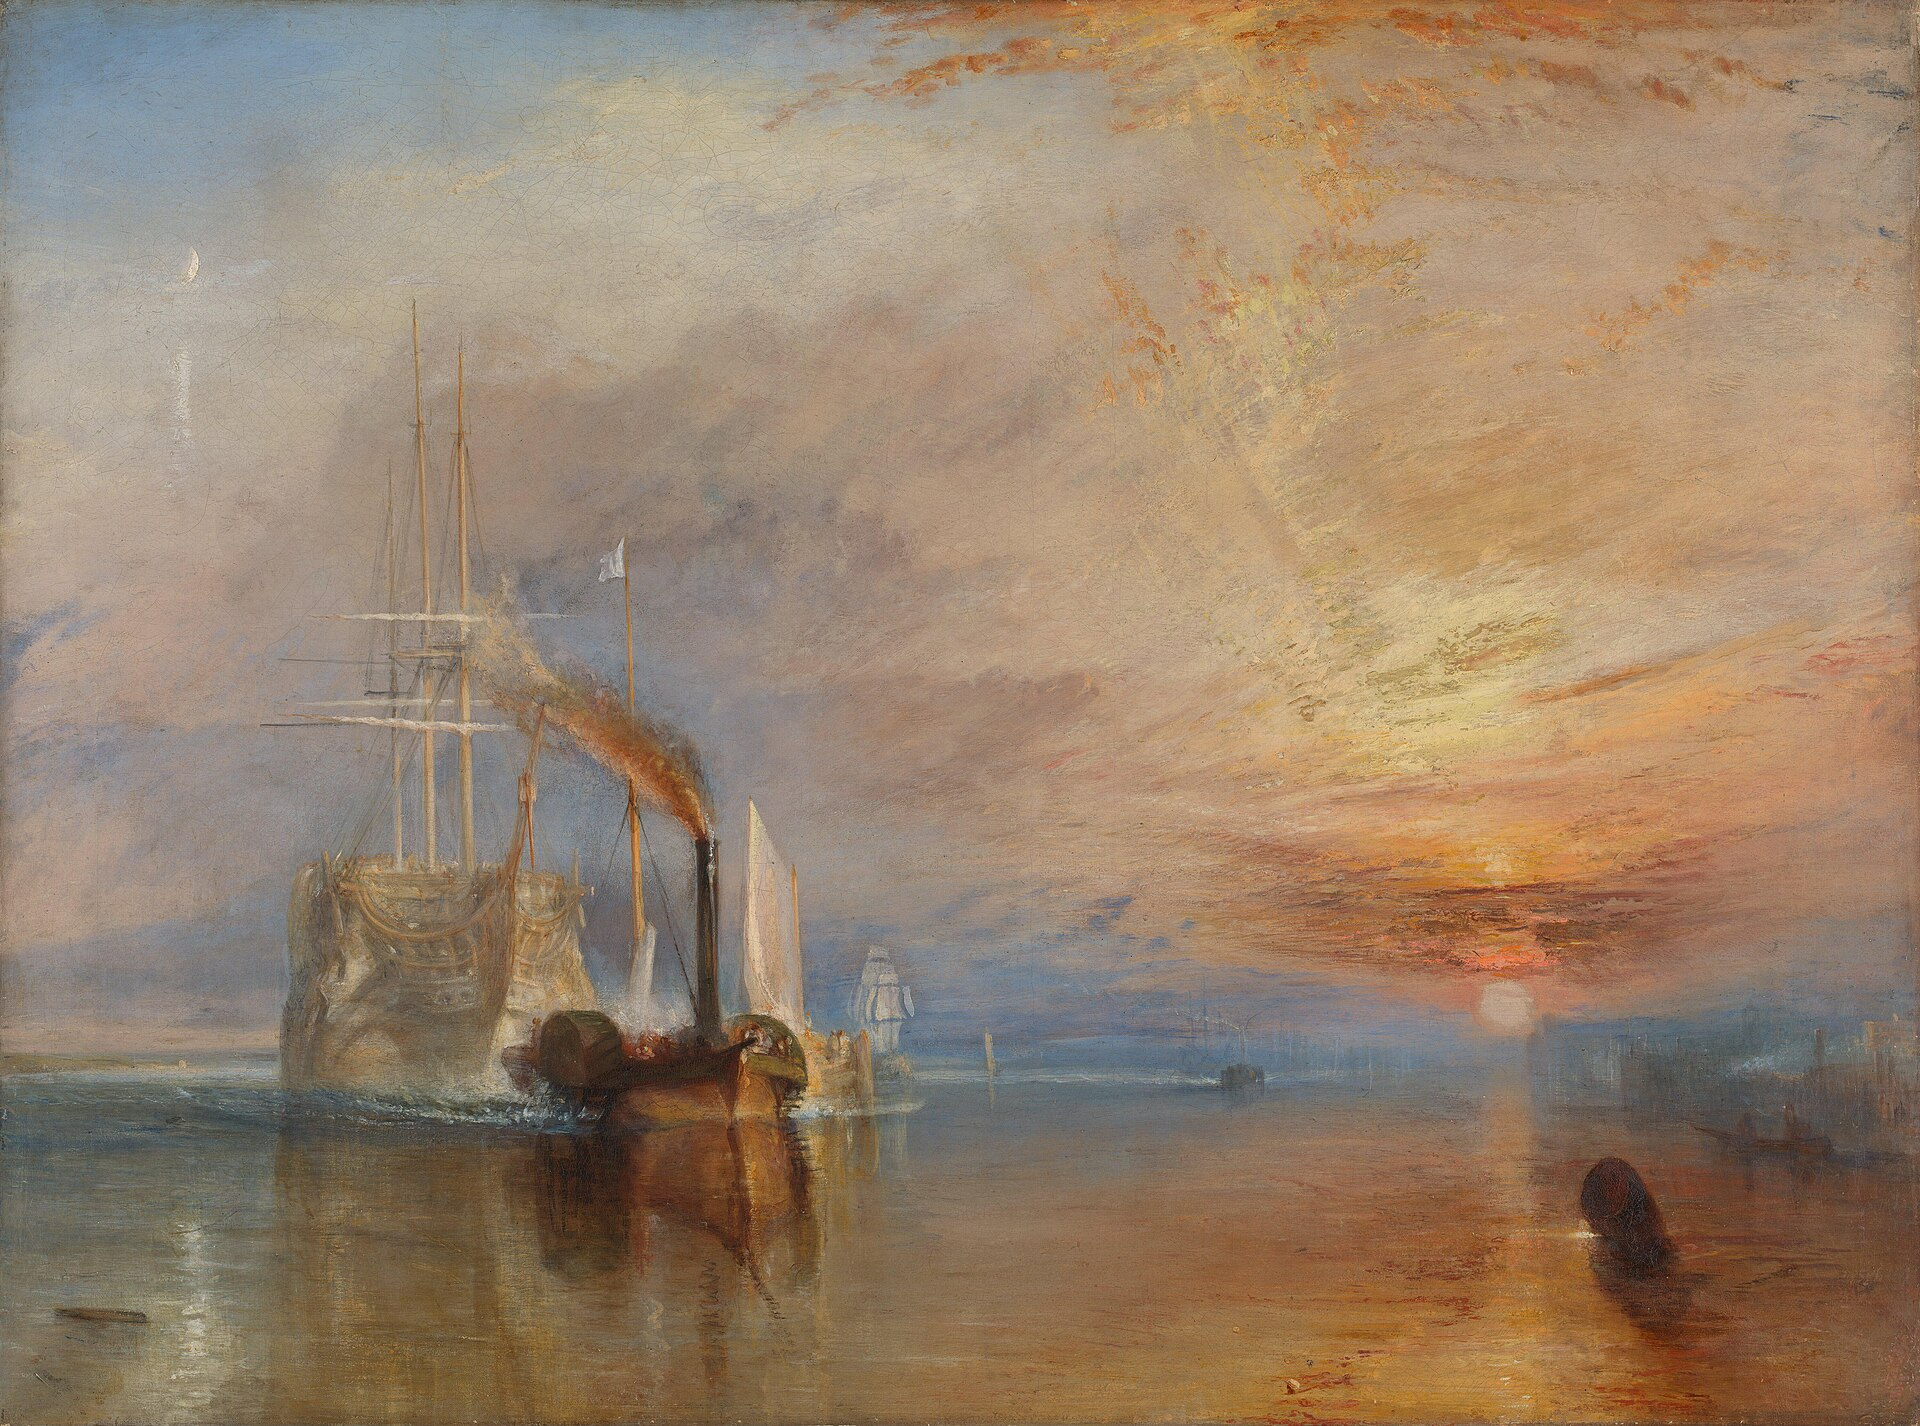

In [7]:
TURNER_IMAGE = "./images/Turner,_J._M._W._-_The_Fighting_Téméraire_tugged_to_her_last_Berth_to_be_broken.jpg"
display(Image(filename=TURNER_IMAGE, width=600))

In [8]:
oscar.see(
    images=TURNER_IMAGE,
    description="A painting shown to you at an art gallery.",
)
oscar.listen("Do you like it? Why or why not?")
oscar.act()

USER --> Oscar: [VISUAL] 
          > A painting shown to you at an art gallery.  An atmospheric oil painting of a large,
          > three‑masted sailing ship being towed by a much smaller steam tug across calm water. A
          > low sun near the right horizon casts warm orange and pink light across the sky and
          > reflective water, while the tug emits a dark plume of smoke. The scene includes a pale
          > crescent moon in the upper left and soft, clouded skies that fill most of the
          > composition. The overall mood is tranquil, with strong visual contrast between the old
          > sailing vessel and the compact steam boat.  Image reference IDs:  [+ 1 image(s):
          > img_2]

USER --> Oscar: [CONVERSATION] 
          > Do you like it? Why or why not?

Oscar acts: [THINK] 
           > Step-by-step impression and analysis: (1) First visual hit — the warm sunset on the
           > right draws the eye immediately; Turner (or a Turner-like treatment) uses colour and
           > light as the emotional centre. (2) Composition: heavy, tangible mass of the old three-
           > masted ship on the left balanced by vast, airy sky and the sun on the right — a
           > classical left/right tension that feels purposeful and elegiac. The small steam tug
           > between them is a brilliant device: it provides scale, movement and a narrative (old
           > technology towed away by new). (3) Palette & atmosphere: warm oranges/pinks mirrored
           > softly on the water provide unity; the thin crescent moon up-left adds a quiet
           > counterpoint and sense of time passing. (4) Brushwork and technique: loose, atmospheric
           > handling creates depth and a sense of air; reflections are handled economically but
           > convincingly. (5) As an architect I note how scale and proportion are communicated —
           > the monumentality of the sailing ship versus the human scale of the tug — which makes
           > the scene emo (...)

Oscar acts: [TALK] 
           > Yes — I like it very much. The painting nails atmosphere and narrative: the warm,
           > luminous sunset gives the scene a melancholy beauty, while the contrast between the
           > majestic sailing ship and the small steam tug tells a simple, powerful story about
           > change and loss. Composition and scale are superb — the ship’s monumentality set
           > against the tug makes the viewer feel the weight of that moment. From a technical and
           > architectural eye I appreciate how proportion, light and negative space are used to
           > guide attention and evoke feeling. It’s the kind of work that makes me quietly
           > sentimental and also professionally jealous — I’d happily design a little waterfront to
           > sit beneath it.

Oscar acts: [DONE] 
           > Finished: shared my thoughts on the painting.

In [9]:
oscar.listen_and_act("Can you guess who is the painter?")

USER --> Oscar: [CONVERSATION] 
          > Can you guess who is the painter?

Oscar acts: [THINK] 
           > Look closely at the visual cues: low, warm, luminous sunset; loose, atmospheric
           > brushwork; a three-masted sailing warship being towed by a small steam tug — that
           > poetic contrast between sail and steam is a narrative Turner loved. The palette and
           > handling of light (almost glowing sky reflected on water) and the faint crescent moon
           > also feel very characteristic of J.M.W. Turner, especially his late, atmospheric
           > seascapes. I'm pretty confident this is Turner, likely The Fighting Temeraire (or a
           > reproduction of it).

Oscar acts: [TALK] 
           > My guess: J.M.W. Turner — very likely The Fighting Temeraire. The sunset light, the
           > smoky tug towing an old sailing ship, and the loose, atmospheric handling are classic
           > Turner. Would you like a short background on the painting or on Turner himself?

Oscar acts: [DONE] 
           > Waiting for your reply.

## 5. Cost tracking

In [10]:
from tinytroupe.clients import client

client().pretty_print_cost_stats()


LLM API COST STATISTICS
Input tokens:         133,655
Output tokens:        36,614
Total tokens:         170,269
Model API calls:      18
Cached calls:         0
Total calls:          18
Avg tokens per call:  9459.4



## Key takeaway

Every substantive observation the agents made — identifying gazpacho bottles, commenting on label colours, diagnosing pneumonia from an X-ray, appreciating a painting's composition — came **exclusively from the images**. No textual product or medical description was provided. The side-by-side comparison (Section 2) makes this especially clear: without the image the agent can only produce vague, generic thoughts.

This demonstrates that TinyTroupe's vision modality enables a fundamentally new class of simulations where agents perceive and reason about visual stimuli just as human participants would — whether they are evaluating a product prototype, interpreting medical imagery, or appreciating a work of art.